# ripe or rotten mango?

In this section, we reload the necessary modules to ensure that any changes in the code are reflected immediately. Additionally, we append a directory to the system path to facilitate module imports from that location. 

In [1]:
import sys 
sys.path.append('../')

%reload_ext autoreload
%autoreload 2

This section includes the necessary libraries for data manipulation, image processing, and visualization, along with custom classes to manage the dataset, load it, and process the images.

In [2]:
import warnings
import pandas as pd 

from src import MangoDataset, ImageProcessor, Graphic

warnings.filterwarnings("ignore")
%matplotlib inline

In this section, we initialize the `MangoDataset`, which contains our training and validation datasets. We then create a DataFrame called `image_df` from the training data, organizing it into two columns: "label" and "filename". This structured format allows for easier manipulation and analysis of our dataset.

In [3]:
dataset = MangoDataset()
train_set = dataset.train_data

image_df = pd.DataFrame(train_set)
print(image_df.shape)
image_df.head(5)

Loaded dataset ../data/raw\train.csv in 0.03 seconds.
Loaded dataset ../data/raw\validation.csv in 0.01 seconds.
(1989, 2)


,filename,label
0,1.jpg,Ripe
1,10.jpg,Ripe
2,1000.jpg,Ripe
3,102.jpg,Ripe
4,103.jpg,Ripe


We create an instance of `ImageProcessor` using the training dataset. This step sets up the processor to handle image preprocessing tasks efficiently.

In [4]:
processor = ImageProcessor(train_set)
edges_set, stats_set = processor.get_processed_data()

Loaded dataset ../data/processed\edges.csv in 14.58 seconds.
Loaded dataset ../data/processed\stats.csv in 9.67 seconds.


After initializing the processor and obtaining the processed images, these images are then organized into a DataFrame called `features_df`, which contains the relevant features for subsequent analysis and modeling.

In [5]:
edges_df = pd.DataFrame(edges_set)
print(edges_df.shape)
edges_df.head()

(1989, 4866)


,filename,label,edge_0,edge_1,edge_2,edge_3,edge_4,edge_5,edge_6,edge_7,...,hist_758,hist_759,hist_760,hist_761,hist_762,hist_763,hist_764,hist_765,hist_766,hist_767
0,1.jpg,1,0,40,114,121,51,10,7,6,...,0,1,0,4,5,5,0,2,0,10
1,10.jpg,1,0,133,82,17,11,9,7,5,...,0,0,0,0,0,0,0,0,0,0
2,1000.jpg,1,0,52,29,25,28,7,2,7,...,0,0,0,0,0,0,0,2,1,2
3,102.jpg,1,0,8,1,1,40,133,229,198,...,0,0,0,0,0,0,0,0,0,0
4,103.jpg,1,0,5,5,4,2,0,1,2,...,0,0,0,0,0,0,0,0,0,0


In [6]:
stats_df = pd.DataFrame(stats_set)
print(stats_df.shape)
stats_df.describe()

(1989, 266)


,label,area,mean_gray,max_gray,min_gray,std_dev_gray,mean_intensity_R,mean_intensity_G,mean_intensity_B,hist_0,...,hist_246,hist_247,hist_248,hist_249,hist_250,hist_251,hist_252,hist_253,hist_254,hist_255
count,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,...,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,0.249874,2842.464052,147.632369,208.428859,58.220211,28.675281,178.999024,152.853027,125.486155,0.015083,...,2.035696,2.449975,2.327803,2.610357,3.015586,5.309703,5.355958,9.194067,24.226747,63.037205
std,0.433049,1826.878779,38.170411,38.952669,37.312466,11.467316,34.923774,39.846724,46.616824,0.650626,...,14.825892,19.571006,10.685609,13.518618,11.290532,42.566383,30.588444,44.237578,119.856258,346.404996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1561.000000,119.739296,177.000000,22.000000,20.902457,150.666504,127.685810,88.288796,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2689.000000,144.065918,208.000000,59.000000,27.447889,174.530329,148.824748,127.983847,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,4072.000000,167.020228,252.000000,87.000000,33.866018,202.340620,175.515419,148.362101,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,18611.000000,252.995843,255.000000,175.000000,101.122722,254.167761,253.212836,252.550475,29.000000,...,400.000000,562.000000,240.000000,482.000000,184.000000,1397.000000,1141.000000,1195.000000,3007.000000,3216.000000


The `show_samples` method is designed to display a selection of original and processed images from the dataset. It randomly samples a specified number of images and presents them in a grid format. The first row shows the original images, while the second row displays the processed images along with their corresponding labels, allowing for a clear comparison of the preprocessing effects.

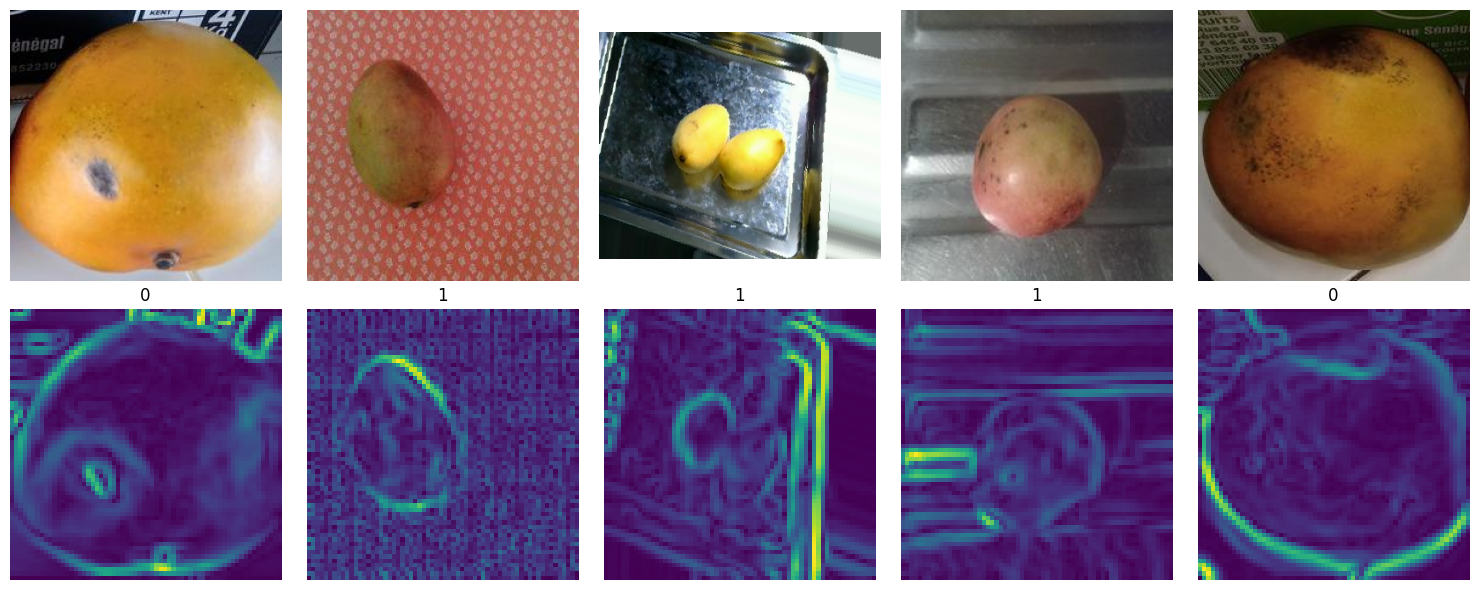

In [7]:
Graphic.show_samples(edges_set, train_set)

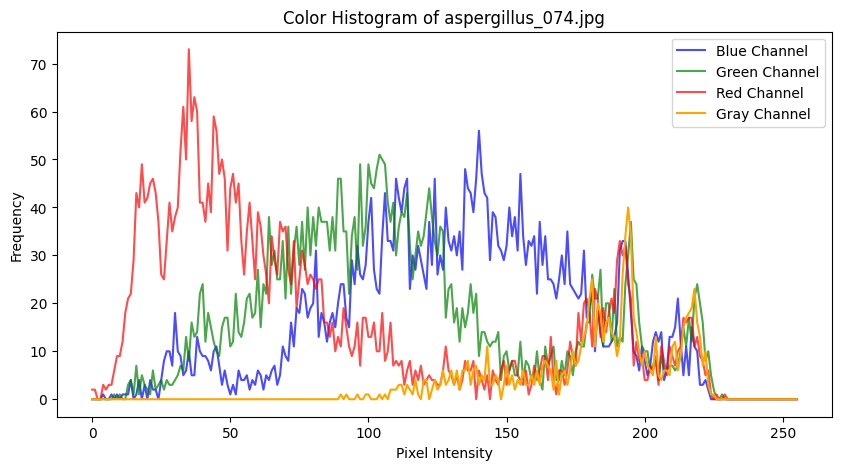

In [11]:
Graphic.show_histogram_samples(edges_set, stats_set)